In [3]:
import requests
import time
import pandas as pd
import datetime
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
%matplotlib inline

In [46]:
word = 'matka'
start = '2017-12-01'
end = '2017-12-02'
language = 'pl'
url = u'https://twitter.com/search?q='+word+'%20since%3A'+start+'%20until%3A'+end+'&l='+language+'&src=typd&f=tweets'

'https://twitter.com/search?q=matka%20since%3A2017-12-01%20until%3A2017-12-02&l=pl&src=typd&f=tweets'

In [286]:
browser = webdriver.Chrome()
browser.get(url)
time.sleep(1)
body = browser.find_element_by_tag_name('body')
for _ in range(5):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.2)

In [76]:
tweets = [tweet.text for tweet in browser.find_elements_by_class_name("tweet-text") if word in tweet.text]
len(tweets)

22

In [287]:
tweets = list()

In [290]:
for date in browser.find_elements_by_class_name("content"):
    soup = BeautifulSoup(date.get_attribute('outerHTML'), 'lxml')
    tweet = soup.find("p", class_="tweet-text").text
    tm = int(soup.find("span", class_="_timestamp").get('data-time')) - 3600
    date = datetime.datetime.fromtimestamp(tm).strftime('%Y-%m-%d %H:%M:%S')
    tweets.append((date, tm, tweet))

In [291]:
browser.close()

In [292]:
df = pd.DataFrame(tweets)
df.columns = ['when', 'timestamp', 'tweet']
df['length'] = len(df['tweet'])

In [297]:
for i in range(len(df)):
    df['length'][i] = len(df['tweet'][i])
df.when = pd.to_datetime(df.when)
# df['time'] = df['when'].dt.time
# df['date'] = df['when'].dt.date
df['timestamp'] = df['timestamp'].astype(str).astype(int)
df['time_s'] = df['timestamp']%86400

C:\Users\Weronika\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [298]:
df.head()

,when,timestamp,tweet,length,time,date,time_s
0,2017-12-01 23:58:45,1512169125,Ale matka nie została wyjebana do bosforu,42,23:58:45,2017-12-01,82725
1,2017-12-01 23:43:45,1512168225,Ja byłem zawsze ten odpowiedzialny więc nie wi...,97,23:43:45,2017-12-01,81825
2,2017-12-01 23:38:39,1512167919,Matka z synem tacy zgrani,26,23:38:39,2017-12-01,81519
3,2017-12-01 23:27:23,1512167243,"Nadęte i udawane. Ale dlaczego nie: ""Unia to n...",224,23:27:23,2017-12-01,80843
4,2017-12-01 23:18:49,1512166729,Niech Matka Boża nad Panią czuwa.,33,23:18:49,2017-12-01,80329


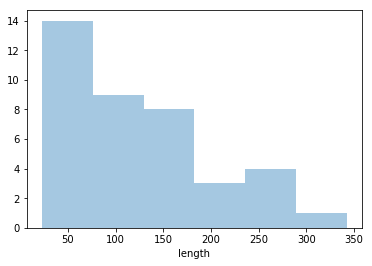

In [192]:
sns.distplot(df.length, kde = False, rug = False);

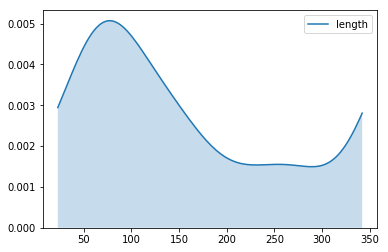

In [240]:
sns.kdeplot(df.length, shade=True, cut = 0)

In [271]:
df.dtypes

when         datetime64[ns]
timestamp             int32
tweet                object
length                int64
time                 object
date                 object
dtype: object

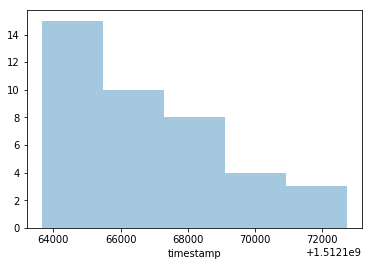

In [273]:
sns.distplot(df.timestamp, kde = False, rug = False);

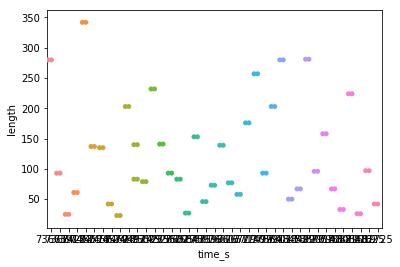

In [300]:
sns.swarmplot(df.time_s, df.length)

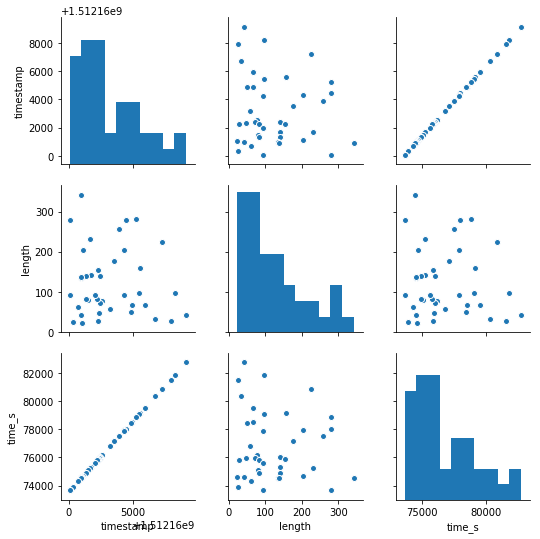

In [301]:
sns.pairplot(df)

In [296]:
df.timestamp % 86400

0     82725
1     81825
2     81519
3     80843
4     80329
5     79512
6     79148
7     79057
8     78850
9     78492
10    78452
11    78011
12    77913
13    77864
14    77499
15    77130
16    76779
17    76151
18    76016
19    75991
20    75936
21    75881
22    75843
23    75827
24    75600
25    75286
26    75255
27    75099
28    74924
29    74924
      ...  
50    78452
51    78011
52    77913
53    77864
54    77499
55    77130
56    76779
57    76151
58    76016
59    75991
60    75936
61    75881
62    75843
63    75827
64    75600
65    75286
66    75255
67    75099
68    74924
69    74924
70    74693
71    74628
72    74579
73    74562
74    74518
75    74505
76    74293
77    73913
78    73687
79    73665
Name: timestamp, Length: 80, dtype: int32

In [282]:
24*60*60

86400

In [285]:
60*60

3600